# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data_path = "../../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1940'  # documents de la décennie 1940–1949


## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB427_1949-07-18_01-00008.txt',
 'KB_JB449_1947-08-29_01-00003.txt',
 'KB_JB555_1940-03-01_01-00004.txt',
 'KB_JB638_1946-07-18_01-00003.txt',
 'KB_JB835_1949-09-18_01-00004.txt']

In [7]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

"Lundi 18 Juillet 1949 WSSSr \nHBjUa^giLA LIBRE BELGIQUE BS^B \nID H • B B B • • • B D • =J I 11 tt l> U B H M E H • B B 9 B B B B B BIli CHRONIQUE FEMININE \nMéditation sur la beauté \n•••-\nc Tu me diras lequel tu préfè\xad\nres, c'est-à-dire celui que tu vou\xad\ndrais avoir devant les yeux pour le \nreste de ta vie sans en être fati\xad\nguée jamais, et nous le volerons \nensemble ! », me dit mon oncle. \nSur cett"

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\alban\Desktop\Master1-STIC\BLOC 2\Traduction automatique des corpus\tac\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 940250 stored elements and shape (1006, 4599)>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

beauté         0.299984
+              0.289721
j'ai           0.269032
dieu           0.177614
n'est          0.152151
                 ...   
décider        0.000000
décidé         0.000000
déclara        0.000000
déclaration    0.000000
♦              0.000000
Length: 4599, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [15]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [16]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(4599,))

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.02239053, 0.        , 0.        , ..., 0.02041129, 0.        ,
       0.        ], shape=(4599,))

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.80187346655586)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1940-01-19_01-00005.txt',
               'KB_JB838_1940-02-06_01-00005.txt',
               'KB_JB838_1940-02-07_01-00005.txt',
               'KB_JB838_1940-02-09_01-00005.txt',
               'KB_JB838_1940-02-12_01-00005.txt',
               'KB_JB838_1940-03-04_01-00005.txt',
               'KB_JB838_1940-04-22_01-00005.txt',
               'KB_JB838_1940-08-02_01-00004.txt',
               'KB_JB838_1940-10-08_01-00005.txt',
               'KB_JB838_1940-10-29_01-00006.txt',
               'KB_JB838_1940-11-05_01-00005.txt',
               'KB_JB838_1940-11-07_01-00005.txt',
               'KB_JB838_1940-12-09_01-00004.txt',
               'KB_JB838_1940-12-11_01-00008.txt',
               'KB_JB838_1941-01-28_01-00005.txt',
               'KB_JB838_1941-03-15_01-00005.txt',
               'KB_JB838_1941-03-17_01-00006.txt',
               'KB_JB838_1941-04-04_01-00008.txt',
               'KB_JB838_1941-05-01_01-00008.txt',
               'KB_JB838_1941-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.15279215, -0.01397891],
       [-0.14048129, -0.06473306],
       [-0.22064576,  0.08605594],
       [-0.12491334, -0.07424307],
       [-0.19231917,  0.04540163],
       [-0.26137116,  0.17185232],
       [ 0.61453471,  0.18345804],
       [ 0.12255914, -0.07558394],
       [-0.29733509,  0.28180812],
       [-0.26311919,  0.13261273]])

### Générer le plot

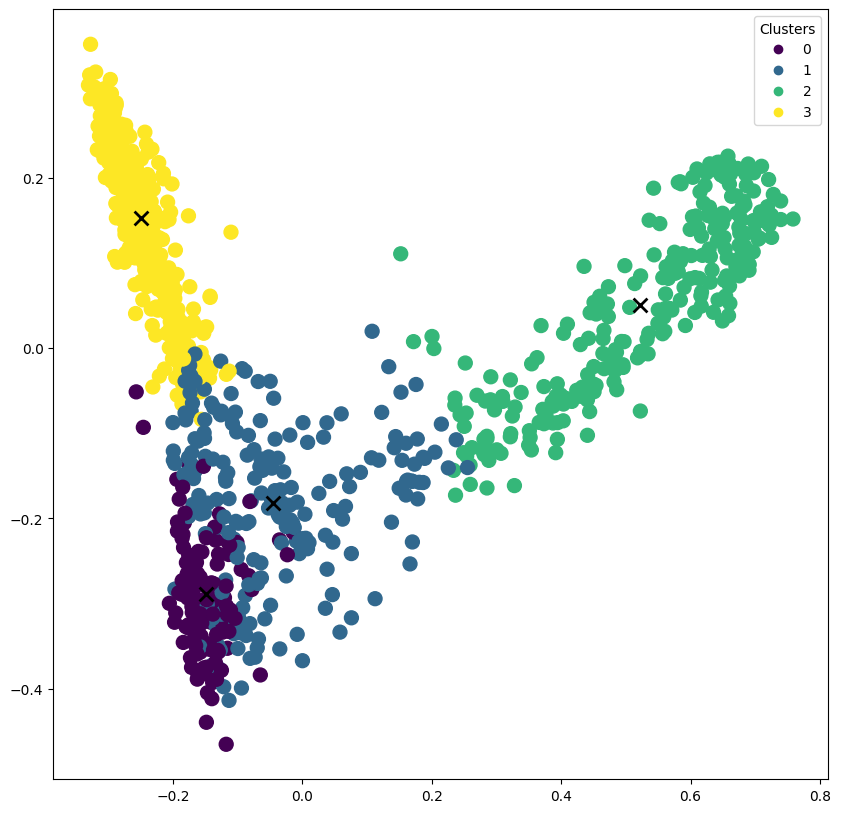

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")